In [91]:
# imports
import pandas as pd
import numpy as np
from helpers import select_entries, clean_categories, custom_style_france_first, custom_style_usa_first
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
import math
from pygal.style import Style

In [92]:
data_folder = "./data/"

In [93]:
france = pd.read_csv(data_folder + 'france_data.csv')
usa = pd.read_csv(data_folder + 'us_data.csv')

# Category: Snacks

First we select all rows that is associated with snacks. Then we clean out the category to smaller categories.

In [94]:
snacks = [
    'snack', 'bar', 'ice cream', 'chips', 'popcorn', 'cake', 'cookie', 'choco', 'sugary', 'salty'
]

In [95]:
snacks_france = select_entries(france, snacks)
snacks_usa = select_entries(usa, snacks)

In [96]:
print("There are %d entries that are classified as snacks for France." % len(snacks_france))
print("There are %d entries that are classified as snacks for USA." % len(snacks_usa))

There are 22364 entries that are classified as snacks for France.
There are 31544 entries that are classified as snacks for USA.


## Sugary snacks

We create one category called `sugary_snacks`. This category will have all snacks defined as sugary and not salty. Then we will devide this category in smaller categories. We also create a dataframe to be used when calculating the distribution.

In [97]:
sugary = [
    'choco', 'coco', 'cookie', 'candy', 'candies', 'candi', 'bonbon', 'fudge', 'caramel', 'bar', 'nougat',
    'sugar', 'sucr', 'cake', 'gâteux', 'ice cream'
]

In [98]:
sugary_snacks_france = select_entries(snacks_france, sugary)
sugary_snacks_usa = select_entries(snacks_usa, sugary)

In [99]:
not_sugary_snacks = [
    'popcorn', 'chips', 'patate', 'potato', 'Snacks salés'
]
not_sugary_snacks_ingredients = ['patate', 'salé', 'salt']

In [100]:
sugary_snacks_france = clean_categories(sugary_snacks_france, not_sugary_snacks, not_sugary_snacks_ingredients)
sugary_snacks_usa = clean_categories(sugary_snacks_usa, not_sugary_snacks, not_sugary_snacks_ingredients)

In [101]:
print("Number of sugary snacks in France: %d" % len(sugary_snacks_france))
print("Number of sugary snacks in USA: %d" % len(sugary_snacks_usa))

Number of sugary snacks in France: 18164
Number of sugary snacks in USA: 11177


In [102]:
sugary_snacks_distr = pd.DataFrame(columns = ['category', 'count', 'country'])

The category contains a lot of rows. We will divide the category into sub-categories `chocolates`, `bars`, `candy` and `cookies`. We start with chocolates.

In [103]:
chocolate = [
    'chocolate', 'chocolat', 'choco', 'cacao', 'coco'
]

In [104]:
chocolates_france = select_entries(sugary_snacks_france, chocolate)
chocolates_usa = select_entries(sugary_snacks_usa, chocolate)

Looking at the frames we do not find any values that clearly should not be there and therefore we skip cleaning the category.

In [105]:
print("Sugary snacks that are made with chocolate in France: %d" % len(chocolates_france))
print("Sugary snacks that are made with chocolate in USA: %d" % len(chocolates_usa))

Sugary snacks that are made with chocolate in France: 10613
Sugary snacks that are made with chocolate in USA: 5742


In [106]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Chocolates', len(chocolates_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Chocolates', len(chocolates_usa), 'USA']], columns=['category', 'count', 'country'])
)

We then move forward to `bars`.

In [107]:
bars = ['bar', 'bars']

In [108]:
bars_france = select_entries(sugary_snacks_france, bars)
bars_usa = select_entries(sugary_snacks_usa, bars)

We look at the dataframes to decide what should not be classified as bars and then remove based on words that are not associated with bars. Note that we keep all bars that are made with chocolate even though these are also in the `chocolates` category.

In [109]:
not_bars = ['barbecue', 'rhubarb', 'barbe', 'baratte', 'barley']

In [110]:
bars_france = clean_categories(bars_france, not_bars)
bars_usa = clean_categories(bars_usa, not_bars)

In [111]:
print('Number of bars in France: %d' % len(bars_france))
print('Number of bars in the USA: %d' % len(bars_usa))

Number of bars in France: 2265
Number of bars in the USA: 2261


In [112]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Bars', len(bars_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Bars', len(bars_usa), 'USA']], columns=['category', 'count', 'country'])
)

Next up is `candy`.

In [113]:
candy = [
    'candy', 'candies', 'bonbon', 'candi', 'confectioneries', 'pastilles', 'mints', 'caramels', 'gummies',
    'lollipop'
]

In [114]:
candy_france = select_entries(sugary_snacks_france, candy)
candy_usa = select_entries(sugary_snacks_usa, candy)

Looking at the frames no values seem to be out of place.

In [115]:
print("Rows classified as candy in France: %d" % len(candy_france))
print("Rows classified as candy in the USA: %d" % len(candy_usa))

Rows classified as candy in France: 1943
Rows classified as candy in the USA: 419


In [116]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Candy', len(candy_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Candy', len(candy_usa), 'USA']], columns=['category', 'count', 'country'])
)

Lastly we create the category `cookies`.

In [117]:
cookies_france = select_entries(sugary_snacks_france, ['cookie', 'biscuit'])
cookies_usa = select_entries(sugary_snacks_usa, ['cookie', 'biscuit'])

In [118]:
not_cookies = [
    'brownie', 'muffin', 'candy', 'candies', 'candi', 'kit kat', 'tourteaux fromagés', 'gaufres', 'gâteau à la',
    'cakes ', 'fondants ', 'pancake', 'ice cream'
]

In [119]:
cookies_france = clean_categories(cookies_france, not_cookies)
cookies_usa = clean_categories(cookies_usa, not_cookies)

In [120]:
print("Number of cookies in France: %d" % len(cookies_france))
print("Number of cookies in USA: %d" % len(cookies_usa))

Number of cookies in France: 4343
Number of cookies in USA: 1822


In [121]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Cookies', len(cookies_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['Cookies', len(cookies_usa), 'USA']], columns=['category', 'count', 'country'])
)

## Salty snacks

The second big category will be `salty_snacks`. We will then divide this category into smaller categories.

In [122]:
salty = [
    'salt', 'salé', 'chips', 'popcorn', 'sodium', 'crisps'
]

In [123]:
salty_snacks_france = select_entries(snacks_france, salty)
salty_snacks_usa = select_entries(snacks_usa, salty)

In [124]:
not_salty = [
    'sucr', 'sugar', 'cake', 'caramel'
]

In [125]:
salty_snacks_france = clean_categories(salty_snacks_france, not_salty)
salty_snacks_usa = clean_categories(salty_snacks_usa, not_salty)

In [126]:
print("Number of salty snacks in France: %d" % len(salty_snacks_france))
print("Number of salty snacks in USA: %d" % len(salty_snacks_usa))

Number of salty snacks in France: 2682
Number of salty snacks in USA: 5692


In [127]:
salty_snacks_distr = pd.DataFrame(columns = ['category', 'count', 'country'])

We divide the category into `chips` and `popcorn`, starting out with `chips`.

In [128]:
chips_france = select_entries(salty_snacks_france, ['chips', 'crisps'])
chips_usa = select_entries(salty_snacks_usa, ['chips', 'crisps'])

In [129]:
print("Number of chips in France: %d" % len(chips_france))
print("Number of chips in USA: %d" % len(chips_usa))

Number of chips in France: 1563
Number of chips in USA: 4102


In [130]:
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Chips', len(chips_france), 'France']], columns=['category', 'count', 'country'])
)
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Chips', len(chips_usa), 'USA']], columns=['category', 'count', 'country'])
)

We then proceed to `popcorn`.

In [131]:
popcorn_france = select_entries(salty_snacks_france, ['popcorn'])
popcorn_usa = select_entries(salty_snacks_usa, ['popcorn'])

In [132]:
print("Number of popcorn in France: %d" % len(popcorn_france))
print("Number of popcorn in USA: %d" % len(popcorn_usa))

Number of popcorn in France: 112
Number of popcorn in USA: 1110


In [133]:
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Popcorn', len(popcorn_france), 'France']], columns=['category', 'count', 'country'])
)
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Popcorn', len(popcorn_usa), 'USA']], columns=['category', 'count', 'country'])
)

The category `biscuits` represent salty crackers and biscuits.

In [134]:
crackers_france = select_entries(salty_snacks_france, ['crackers', 'biscuit'])
crackers_usa = select_entries(salty_snacks_usa, ['crackers', 'biscuit'])

In [135]:
print("Number of biscuits in France: %d" % len(crackers_france))
print("Number of biscuits in USA: %d" % len(crackers_usa))

Number of biscuits in France: 518
Number of biscuits in USA: 78


In [136]:
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Biscuits', len(crackers_france), 'France']], columns=['category', 'count', 'country'])
)
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Biscuits', len(crackers_usa), 'USA']], columns=['category', 'count', 'country'])
)

Last subcategory is `nuts_and_seeds`.

In [137]:
nuts_france = select_entries(salty_snacks_france, ['nut', 'almond'])
nuts_usa = select_entries(salty_snacks_usa, ['nut', 'almond'])

In [138]:
print("Number of nuts and seeds in France: %d" % len(nuts_france))
print("Number of nuts and sees in USA: %d" % len(nuts_usa))

Number of nuts and seeds in France: 139
Number of nuts and sees in USA: 318


In [139]:
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Nuts and seeds', len(nuts_france), 'France']], columns=['category', 'count', 'country'])
)
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['Nuts and seeds', len(nuts_usa), 'USA']], columns=['category', 'count', 'country'])
)

# Distribution of snacks

We start by creating dataframes for both sugary and salty snacks.

In [233]:
france_sugary = sugary_snacks_distr.loc[sugary_snacks_distr['country'] == 'France'].copy()
usa_sugary = sugary_snacks_distr.loc[sugary_snacks_distr['country'] == 'USA'].copy()
france_sugary['procent'] = france_sugary['count'].apply(
    lambda x: x/france_sugary['count'].sum()
)
usa_sugary['procent'] = usa_sugary['count'].apply(
    lambda x: x/usa_sugary['count'].sum()
)

sugary_snacks_distr = pd.concat([france_sugary, usa_sugary])

In [234]:
france_salty = salty_snacks_distr.loc[salty_snacks_distr['country'] == 'France'].copy()
usa_salty = salty_snacks_distr.loc[salty_snacks_distr['country'] == 'USA'].copy()
france_salty['procent'] = france_salty['count'].apply(
    lambda x: x/france_salty['count'].sum()
)
usa_salty['procent'] = usa_salty['count'].apply(
    lambda x: x/usa_salty['count'].sum()
)

salty_snacks_distr = pd.concat([france_salty, usa_salty])

In [235]:
sugary_snacks_distr

,category,count,country,procent
0,Chocolates,10613,France,0.553799
0,Bars,2265,France,0.118190
0,Candy,1943,France,0.101388
0,Cookies,4343,France,0.226623
0,Chocolates,5742,USA,0.560523
0,Bars,2261,USA,0.220715
0,Candy,419,USA,0.040902
0,Cookies,1822,USA,0.177860


In [236]:
salty_snacks_distr

,category,count,country,procent
0,Chips,1563,France,0.670240
0,Popcorn,112,France,0.048027
0,Biscuits,518,France,0.222127
0,Nuts and seeds,139,France,0.059605
0,Chips,4102,USA,0.731455
0,Popcorn,1110,USA,0.197932
0,Biscuits,78,USA,0.013909
0,Nuts and seeds,318,USA,0.056705


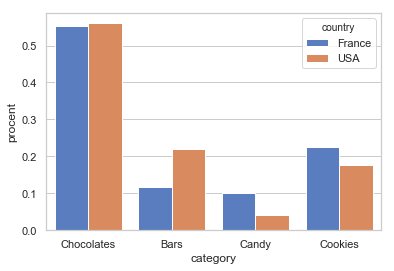

In [237]:
sns.set(style="whitegrid")

g = sns.barplot(x='category', y="procent", hue="country", data=sugary_snacks_distr, palette="muted")

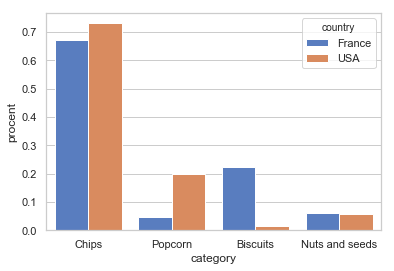

In [238]:
sns.set(style="whitegrid")

g = sns.barplot(x='category', y="procent", hue="country", data=salty_snacks_distr, palette="muted")

In [239]:
sugary_france_distr = sugary_snacks_distr[sugary_snacks_distr.country == 'France']
sugary_usa_distr = sugary_snacks_distr[sugary_snacks_distr.country == 'USA']
salty_france_distr = salty_snacks_distr[salty_snacks_distr.country == 'France']
salty_usa_distr = salty_snacks_distr[salty_snacks_distr.country == 'USA']

In [240]:
bar_chart_distri = pygal.Bar(style=custom_style_france_first)
bar_chart_distri.title = 'Distribution within sugary snacks'
bar_chart_distri.x_title = 'Categories'
bar_chart_distri.y_title = 'Percent of the distribution'
bar_chart_distri.x_labels = list(sugary_snacks_distr.category.unique())
bar_chart_distri.y_labels = [
    {'label': '0%', 'value': 0.0},
    {'label': '10%', 'value': 0.1},
    {'label': '20%', 'value': 0.2},
    {'label': '30%', 'value': 0.3},
    {'label': '40%', 'value': 0.4},
    {'label': '50%', 'value': 0.5},
    {'label': '60%', 'value': 0.6}
]
bar_chart_distri.add('France', sugary_france_distr['procent'], formatter=lambda y: "{0:.1f}%".format(y*100))
bar_chart_distri.add('USA', sugary_usa_distr['procent'], formatter=lambda y: "{0:.1f}%".format(y*100))
bar_chart_distri.render_to_file('sugary_snacks_distribution.svg')  

In [241]:
bar_chart_distri2 = pygal.Bar(style=custom_style_france_first)
bar_chart_distri2.title = 'Distribution within salty snacks'
bar_chart_distri2.x_title = 'Categories'
bar_chart_distri2.y_title = 'Percent of the distribution'
bar_chart_distri2.x_labels = list(salty_snacks_distr.category.unique())
bar_chart_distri2.y_labels = [
    {'label': '0%', 'value': 0.0},
    {'label': '10%', 'value': 0.1},
    {'label': '20%', 'value': 0.2},
    {'label': '30%', 'value': 0.3},
    {'label': '40%', 'value': 0.4},
    {'label': '50%', 'value': 0.5},
    {'label': '60%', 'value': 0.6},
    {'label': '70%', 'value': 0.7},
    {'label': '80%', 'value': 0.8}
]
bar_chart_distri2.add('France', salty_france_distr['procent'], formatter=lambda y: "{0:.1f}%".format(y*100))
bar_chart_distri2.add('USA', salty_usa_distr['procent'], formatter=lambda y: "{0:.1f}%".format(y*100))
bar_chart_distri2.render_to_file('salty_snacks_distribution.svg')  

# Nutrition

In [242]:
sugary_snacks_france = sugary_snacks_france.reset_index(drop=True)
salty_snacks_france = salty_snacks_france.reset_index(drop=True)

sugary_snacks_usa = sugary_snacks_usa.reset_index(drop=True)
salty_snacks_usa = salty_snacks_usa.reset_index(drop=True)

We'll start by looking at the sugar content in `sugary_snacks`.

In [243]:
france_nutrition = sugary_snacks_france[['sugars_100g','energy_100g',
'carbohydrates_100g', 'serving_quantity']].astype(float).replace({0.0:np.nan})
usa_nutrition = sugary_snacks_usa[['sugars_100g','energy_100g',
'carbohydrates_100g', 'serving_quantity']].astype(float).replace({0.0:np.nan})

In [244]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Sugar in sugary snacks'
box_chart.y_title = 'Sugars per 100g (g)'
box_chart.add('France', france_nutrition['sugars_100g'].dropna())
box_chart.add('USA', usa_nutrition['sugars_100g'].dropna())
box_chart.render_to_file('snacks_sugars.svg')  

In [245]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Energy in sugary snacks'
box_chart.y_title = 'Energy per 100g (g)'
box_chart.add('France', france_nutrition['energy_100g'].dropna())
box_chart.add('USA', usa_nutrition['energy_100g'].dropna())
box_chart.render_to_file('snacks_sugary_energy.svg')  

In [246]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Carbohydrates in sugary snacks'
box_chart.y_title = 'Carbohydrates per 100g (g)'
box_chart.add('France', france_nutrition['carbohydrates_100g'].dropna())
box_chart.add('USA', usa_nutrition['carbohydrates_100g'].dropna())
box_chart.render_to_file('snacks_sugary_carbohydrates.svg')

In [247]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Serving quantity of sugary snacks'
box_chart.y_title = 'Serving quantity (g)'
box_chart.add('France', france_nutrition['serving_quantity'].dropna())
box_chart.add('USA', usa_nutrition['serving_quantity'].dropna())
box_chart.render_to_file('snacks_sugary_servings.svg')

The result is hard to see because we have outliers. We will remove these for this visualisation to see the distribution clearly.

In [248]:
france_nutrition_cleaned = france_nutrition.copy()
usa_nutrition_cleaned = usa_nutrition.copy()

In [249]:
mask_max_f = france_nutrition_cleaned.energy_100g > 3000
france_nutrition_cleaned.loc[mask_max_f, 'energy_100g'] = np.nan
mask_max_u = usa_nutrition_cleaned.energy_100g > 3000
usa_nutrition_cleaned.loc[mask_max_u, 'energy_100g'] = np.nan

Removing outliers gives a plot that more clearly shows the distribution in the countries.

In [250]:
box_chart = pygal.Box(style=custom_style_france_first)
box_chart.title = 'Energy per 100g'
box_chart.add('France', france_nutrition_cleaned['energy_100g'].dropna())
box_chart.add('USA', usa_nutrition_cleaned['energy_100g'].dropna())
box_chart.render_to_file('snacks_sugary_energy_cleaned.svg') 

We try another way, by using a histogram instead, removing the outliers.

In [251]:
# Calculate bin size for 50 bins
bin_size_france = france_nutrition_cleaned.energy_100g.dropna().max()/50

# Make bins
bins_france = np.zeros(51)
for i in range(51):
    bins_france[i] = i*bin_size_france
    
values_bins_france = pd.cut(france_nutrition_cleaned.energy_100g.dropna(), bins_france)

# Format bins for pygal
bins_histo_france = list(zip(values_bins_france.value_counts().sort_index(), bins_france[:-1], bins_france[1:]))

In [252]:
hist_energy_france = pygal.Histogram(style=custom_style_france_first)
hist_energy_france.title = 'Distribution of energy per 100g'
hist_energy_france.x_title = 'Energy per 100g in kJ'
hist_energy_france.y_title = 'Number of products'
hist_energy_france.add('France', bins_histo_france)
hist_energy_france.render_to_file('energy_sugary_snacks_france_hist.svg') 

In [253]:
# Calculate bin size for 50 bins
bin_size_usa = usa_nutrition_cleaned.energy_100g.dropna().max()/50

# Make bins
bins_usa = np.zeros(51)
for i in range(51):
    bins_usa[i] = i*bin_size_usa
    
values_bins_usa = pd.cut(usa_nutrition_cleaned.energy_100g.dropna(), bins_usa)

# Format bins for pygal
bins_histo_usa = list(zip(values_bins_usa.value_counts().sort_index(), bins_usa[:-1], bins_usa[1:]))

In [254]:
hist_energy_usa = pygal.Histogram(style=custom_style_usa_first)
hist_energy_usa.title = 'Distribution of energy per 100g'
hist_energy_usa.x_title = 'Energy per 100g in kJ'
hist_energy_usa.y_title = 'Number of products'
hist_energy_usa.add('USA', bins_histo_usa)
hist_energy_usa.render_to_file('energy_sugary_snacks_usa_hist.svg') 

Start of by cleaning `salty_snacks`.

In [255]:
france_salty_nutrition = salty_snacks_france[['sodium_100g', 'fat_100g', 'saturated-fat_100g', 'energy_100g',
'carbohydrates_100g', 'serving_quantity']].astype(float).replace({0.0:np.nan})
usa_salty_nutrition = salty_snacks_usa[['sodium_100g', 'fat_100g', 'saturated-fat_100g', 'energy_100g',
'carbohydrates_100g', 'serving_quantity']].astype(float).replace({0.0:np.nan})

france_salty_nutrition_cleaned = france_salty_nutrition.copy()
usa_salty_nutrition_cleaned = usa_salty_nutrition.copy()

mask_max_f = france_salty_nutrition_cleaned.energy_100g > 3000
france_salty_nutrition_cleaned.loc[mask_max_f, 'energy_100g'] = np.nan
mask_max_u = usa_salty_nutrition_cleaned.energy_100g > 3000
usa_salty_nutrition_cleaned.loc[mask_max_u, 'energy_100g'] = np.nan

Wecreate box plots for all nutriments except `energy_100g`.

In [256]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Sodium in salty snacks'
box_chart.y_title = 'Sodium per 100g (g)'

box_chart.add('France', np.log(france_salty_nutrition['sodium_100g'] + 1).dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('USA', np.log(usa_salty_nutrition['sodium_100g'] + 1).dropna())
box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 50, 100]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('snacks_salty_sodium.svg') 

In [257]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Fats in salty snacks'
box_chart.y_title = 'Fat per 100g (g)'

box_chart.add('France', france_salty_nutrition['fat_100g'].dropna())
box_chart.add('USA', usa_salty_nutrition['fat_100g'].dropna())
box_chart.render_to_file('snacks_salty_fats.svg')  

In [258]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Saturated fat in salty snacks'
box_chart.y_title = 'Saturated fat per 100g (g)'

box_chart.add('France', np.log(france_salty_nutrition['saturated-fat_100g'] + 1).dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('USA', np.log(usa_salty_nutrition['saturated-fat_100g'] + 1).dropna())
box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 50, 100]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('snacks_salty_saturated_fat.svg')  

In [259]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Carbohydrates in salty snacks'
box_chart.y_title = 'Carbohydrates per 100g (g)'

box_chart.add('France', france_salty_nutrition['carbohydrates_100g'].dropna())
box_chart.add('USA', usa_salty_nutrition['carbohydrates_100g'].dropna())
box_chart.render_to_file('snacks_salty_carbohydrates.svg')  

In [260]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Serving quantity for salty snacks'
box_chart.y_title = 'Serving quantity (g)'

box_chart.add('France', np.log(france_salty_nutrition['serving_quantity'] + 1).dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('USA', np.log(usa_salty_nutrition['serving_quantity'] + 1).dropna())
box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 20, 25, 30, 40]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('snacks_salty_servings.svg')  

In [261]:
# Calculate bin size for 50 bins
bin_size_france = france_salty_nutrition_cleaned.energy_100g.dropna().max()/50

# Make bins
bins_france = np.zeros(51)
for i in range(51):
    bins_france[i] = i*bin_size_france
    
values_bins_france = pd.cut(france_salty_nutrition_cleaned.energy_100g.dropna(), bins_france)

# Format bins for pygal
bins_histo_france = list(zip(values_bins_france.value_counts().sort_index(), bins_france[:-1], bins_france[1:]))

In [262]:
hist_energy_france = pygal.Histogram(style=custom_style_france_first)
hist_energy_france.title = 'Distribution of energy per 100g'
hist_energy_france.x_title = 'Energy per 100g in kJ'
hist_energy_france.y_title = 'Number of products'
hist_energy_france.add('France', bins_histo_france)
hist_energy_france.render_to_file('energy_salty_snacks_france_hist.svg') 

In [263]:
# Calculate bin size for 50 bins
bin_size_usa = usa_salty_nutrition_cleaned.energy_100g.dropna().max()/50

# Make bins
bins_usa = np.zeros(51)
for i in range(51):
    bins_usa[i] = i*bin_size_usa
    
values_bins_usa = pd.cut(usa_salty_nutrition_cleaned.energy_100g.dropna(), bins_usa)

# Format bins for pygal
bins_histo_usa = list(zip(values_bins_usa.value_counts().sort_index(), bins_usa[:-1], bins_usa[1:]))

In [264]:
hist_energy_usa = pygal.Histogram(style=custom_style_usa_first)
hist_energy_usa.title = 'Distribution of energy per 100g'
hist_energy_usa.x_title = 'Energy per 100g in kJ'
hist_energy_usa.y_title = 'Number of products'
hist_energy_usa.add('USA', bins_histo_usa)
hist_energy_usa.render_to_file('energy_salty_snacks_usa_hist.svg') 